# 1. 분류 모형 성과 평가
* 여러 분류 기법들을 적용해보고 여러 모댈 중 가장 예측력이 좋은 모델을 최종 모델로 선정하기 위해서는 평가 기준이 필요
* 분류 모형의 성과를 평가하는 이유는 **모델의 성능을 높이기 위해서다**

# 2. 오류분류표(컨퓨전메트릭스, Confusion Matrix) ***

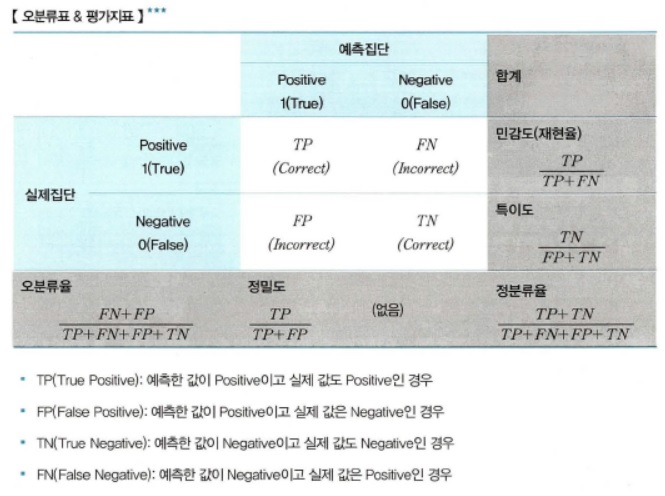

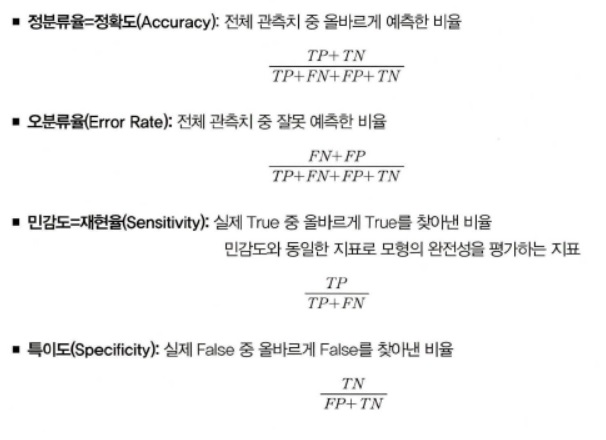

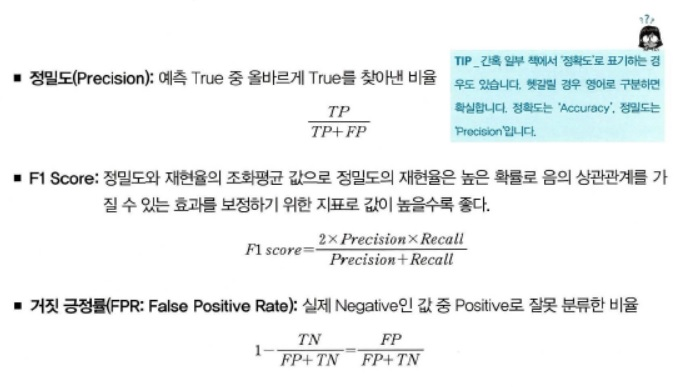

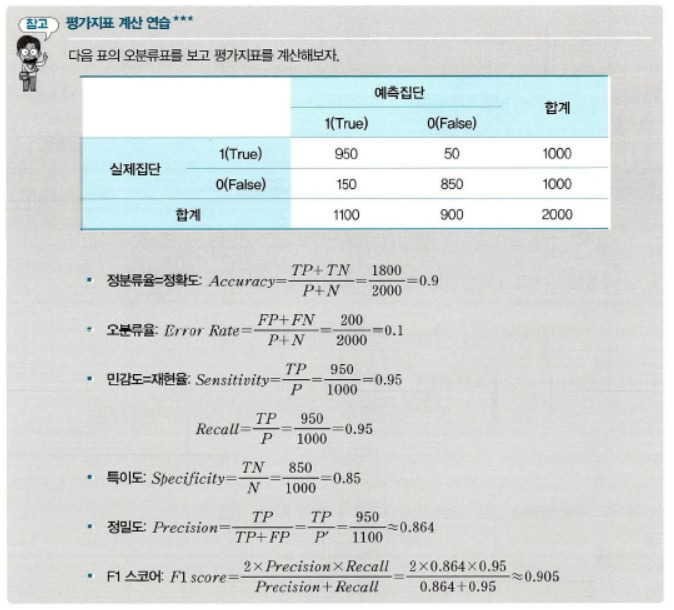

# 3. ROC 커브 ***  - 0,1 의 이진분류 성능평가

* ROC 커브(Receiver Operating Characteristic Curve)는 분류 분석 모형의 평가를 쉽게 비교할 수 있도록 시각화한 그래프
* x축은 FPR(1-특이도) 값을， y축은 TPR(민감도) 값을 갖는 그래프다.
* 특이도(Specificity) = TN / (TN + FN)
* 민감도(Sensitivity/Recall) = TP / (TP + FP)
* **이진 분류(0 또는 1) 모형의 성능을 평가하기 위해 시용된다**
* ROC 커브의 아래 면적을 나타내는 ‘AUROC(Area Under ROC) ’의 값이 1 에 가까울수록 모형의 성능이 우수하며，0.5에 가까울수록무작위로 예측히는 랜덤 모댈에 가까운 좋지 못한 모형이다.


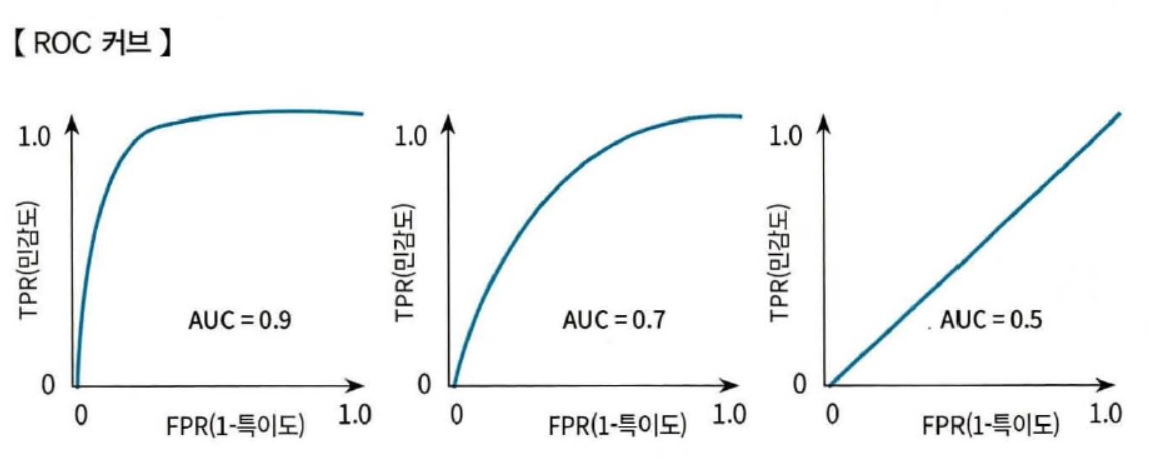

# 4. 이익도표(Lift Chart)**
* 이익도표(Lift Chart), 이득곡선(Gain Cuve) 혹은 이득도표(Gain Chart) 라고도 하며 모델의 성능을 판단하기 위해 작성한 표다.
* 목표범주(위 예제에서 setosa, 1 변 그립에 속할 획률을 내림차순으로 정렬하여 몇 개의 구간으로 나누어 각 구간에서의 성능을 판단하고 랜덤 모벨보다 얼마나 더 뛰어난 성능을 보이는지를 판단한다.
* 일반적으로‘0.5’에서 cut-off 하며，'1.0'이 가장 높은 기준

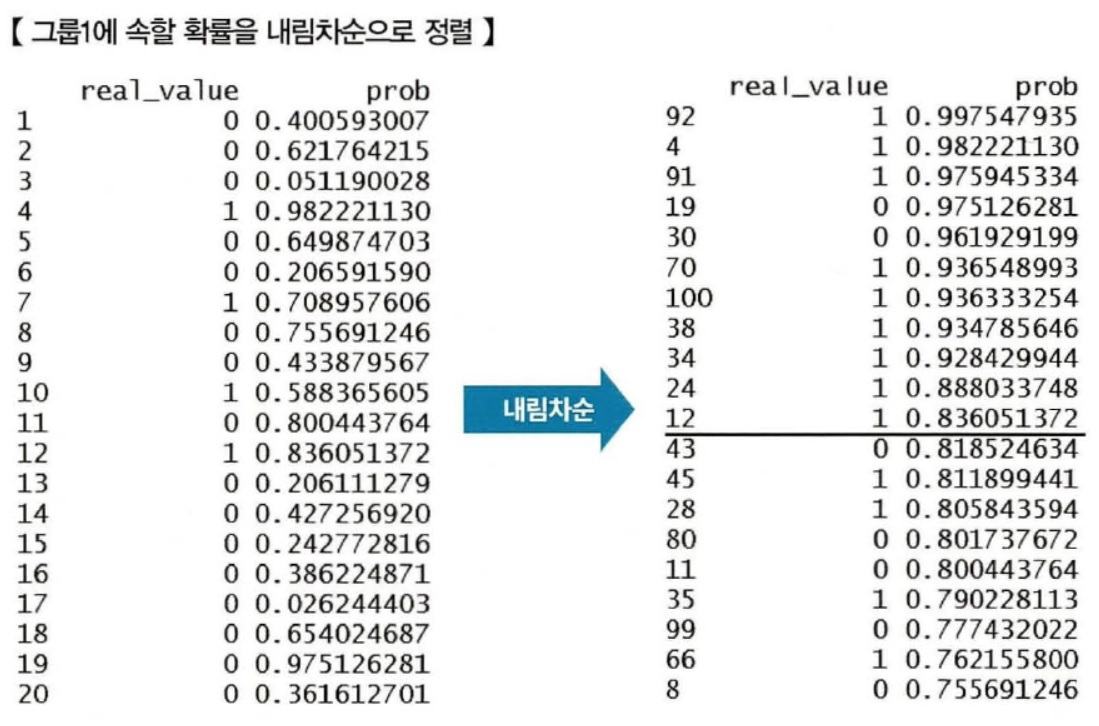

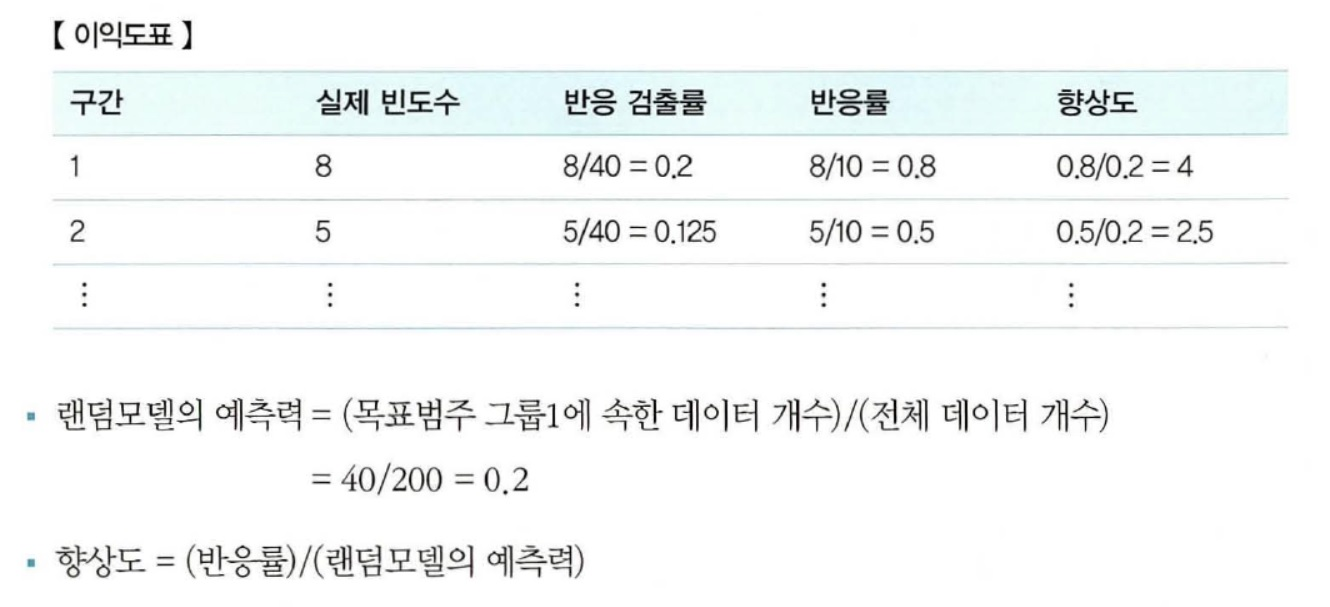

# 5. 향상도 곡선(Lift Curve) **
* 랜덤 모델과 비교하여 해당 모댈의 성과가 얼마나 향상되었는지 구간별로 파익하기 위한 그래프
* 좋은 모델일수록 큰 값에서 시작하여 급격히 감소

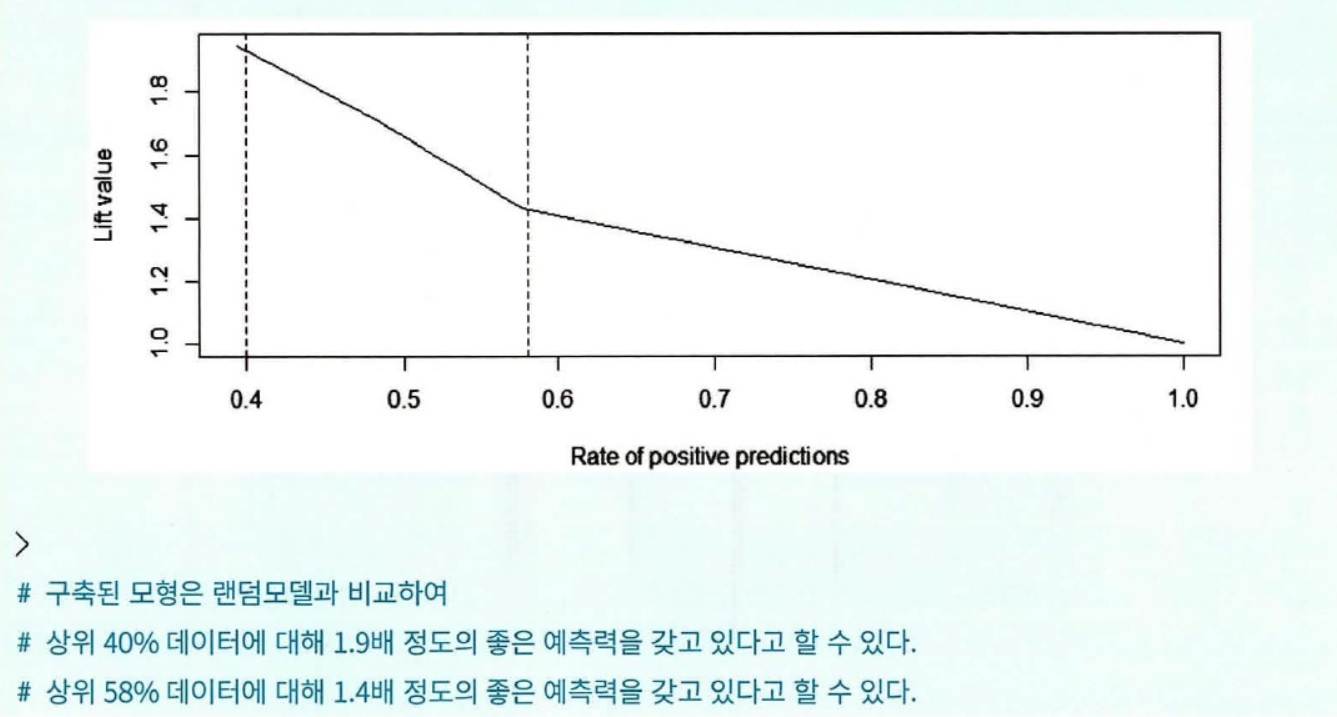

# 6. 분류 분석 후 분류 모형 성과 평가 과정 실습

## 1) 라이브러리 import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2) 데이터 로드

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 3) EDA(탐색적 데이터 분석) 및 데이터 전처리

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### (1) 결측값 (null, NA, NaN값) 처리하기

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### A. 결측값을 dropna()로 모두 삭제하기 - 단순대치법

In [5]:
data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [6]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### B. 결측값을 평균 값 혹은 다른 텍스트로 대체하기 - 평균대치법

In [8]:
round(data['Age'].mean())

30

In [9]:
data['Age'] = data['Age'].fillna(round(data['Age'].mean()))

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
data['Age'].value_counts()

30.00    202
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64

### (2) 특성 선택/제조하기(Feature Engineering)

#### A. Cabin 은 결과에 큰 영향을 주지 않을 것으로 예상되므로 삭제

In [13]:
data.drop(["Cabin"], axis= 1, inplace=True)

In [14]:
data.dropna(inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


#### B. 나이는 연령대별로 구간화가 가능하므로 유아부터 90대까지 구간화

In [16]:
def age_adj(x):
    if x < 10:
        return 'under 10s'
    elif 10 <= x < 20:
        return '10s'
    elif 20<= x < 30:
        return '20s'
    elif 30 <= x < 40:
        return '30s'
    elif  40<= x <50:
        return '40s'
    elif 50 <= x < 60:
        return '50s'
    elif 60 <= x < 70:
        return '60s'
    elif 70 <= x <80:
        return '70s'
    elif 80 <= x <90:
        return '80s'
    else:
        return '90s'

In [17]:
data['Age'] = data['Age'].apply(lambda x : age_adj(x))

In [18]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,20s,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,30s,1,0,PC 17599,71.2833,C


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    object 
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.3+ KB


In [20]:
data2 = data.copy()

#### C. 범주형 데이터 One-Hot Encoding 하기

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,20s,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,30s,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,20s,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,30s,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,30s,0,0,373450,8.0500,S


In [22]:
data = data.drop(['PassengerId','Name', 'Ticket'], axis=1)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    object 
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 62.5+ KB


In [24]:
data = pd.get_dummies(data, columns=['Age', 'Sex', 'Embarked'], drop_first=True)

In [25]:
data

,Survived,Pclass,SibSp,Parch,Fare,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s,Age_70s,Age_80s,Age_under 10s,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,1,0,0,0,0,0,0,0,1,0,1
1,1,1,1,0,71.2833,0,1,0,0,0,0,0,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,0,0,0,0,0,0,0,1
3,1,1,1,0,53.1000,0,1,0,0,0,0,0,0,0,0,1
4,0,3,0,0,8.0500,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,1,0,0,0,0,0,0,0,1,0,1
887,1,1,0,0,30.0000,0,0,0,0,0,0,0,0,0,0,1
888,0,3,1,2,23.4500,0,1,0,0,0,0,0,0,0,0,1
889,1,1,0,0,30.0000,1,0,0,0,0,0,0,0,1,0,0


## 4) 데이터 분석을 위해 훈련/테스트 세트로 데이터 분할

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## 5) 의사결정나무 알고리즘을 사용해 1차 분석

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
model =  DecisionTreeClassifier(max_depth =10, random_state=100)

In [30]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=100)

In [31]:
pred = model.predict(X_test)

## 6) 1차 의사결정나무로 분석한 결과 평가

In [32]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, roc_curve

### (1) 컨퓨전메트릭스(Confusion Matrics)를 활용해 분석 결과 평가

In [33]:
cm = pd.DataFrame(confusion_matrix(y_test, pred))
cm

,0,1
0,97,17
1,19,45


In [34]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print("tp: ", tp, \
      "fp: ", fp, \
      "tn: ", tn, \
      "fn: ", fn)

tp:  45 fp:  17 tn:  97 fn:  19


#### A. 정분류율/정확도 Accuracy = (TP + TN) / TP+FN+FP+TN
* (45+97) / (45+17) + (99+19) 

In [35]:
(45+97) / ((45+17) + (97+19))

0.797752808988764

* 정확도 Accuracy: 79.77 %

In [36]:
accuracy_score(y_test, pred)

0.797752808988764

#### B. 재현율(Recall)/민감도(Sensitivity) = TP / (TP + FN)
* 45 / (45+19)

In [37]:
45 / (45+19)

0.703125

In [38]:
print(recall_score(y_test, pred))

0.703125


#### C. 오분류표/평가지표/컨퓨전메트릭스(confusion matrics)

In [39]:
confusion_matrix(y_test, pred)

array([[97, 17],
       [19, 45]])

D. Classification_Report 를 사용해 Precision, Recall, F1-score, Accuracy 한 번에 보기

In [40]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       114
           1       0.73      0.70      0.71        64

    accuracy                           0.80       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



#### (2) ROC 커브

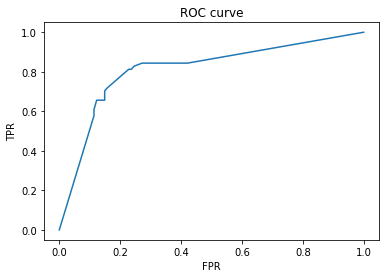

In [41]:
import matplotlib.pyplot as plt
predictions = model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## 7) 모델 평가 분석 후 하이퍼파라미터 조정 및 분석 결과 비교

### (1) 의사결정나무의 여러 하이퍼파라미터 중 depth만 변경하여 결과 비교

In [42]:
accuracy = []
for i in range(2, 31):
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    # print(i, round(accuracy_score(y_test, pred), 4))
    accuracy.append((model.score(X_train, y_train), model.score(X_test, y_test)))
    

In [43]:
temp = pd.DataFrame(accuracy, columns=["Train", "Test"])

In [44]:
temp

,Train,Test
0,0.790436,0.769663
1,0.814346,0.848315
2,0.832630,0.859551
3,0.839662,0.831461
4,0.864979,0.831461
5,0.872011,0.837079
6,0.884669,0.837079
7,0.898734,0.797753
8,0.908579,0.797753
9,0.922644,0.797753


### (2) depth 변화에 따른 모델 향상도 곡선

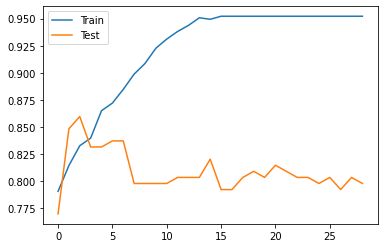

In [45]:
temp.plot()

## 8) 최고 성능이 나온 하이퍼파라미터를 이용해 최종 모델 생성

In [46]:
model = DecisionTreeClassifier(max_depth = 4)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(round(accuracy_score(y_test, pred), 4))

0.8596


### (1) Confusion Matrics 확인

In [47]:
print(confusion_matrix(y_test, pred))

[[105   9]
 [ 16  48]]


### (2) Classification_Report 확인

In [48]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       114
           1       0.84      0.75      0.79        64

    accuracy                           0.86       178
   macro avg       0.85      0.84      0.84       178
weighted avg       0.86      0.86      0.86       178



### (3) 이익도표(Lift Chart)

In [53]:
Lift_Chart = pd.DataFrame(model.predict_proba(X_test))
Lift_Chart["real_value"] = pred
Lift_Chart.head()

,0,1,real_value
0,0.910798,0.089202,0
1,0.900000,0.100000,0
2,0.875000,0.125000,0
3,0.630631,0.369369,0
4,0.860000,0.140000,0


In [57]:
Lift_Chart = Lift_Chart.sort_values(by=1, ascending=False)
Lift_Chart.head(10)

,0,1,real_value
140,0.0,1.0,1
80,0.0,1.0,1
170,0.0,1.0,1
79,0.0,1.0,1
148,0.0,1.0,1
144,0.0,1.0,1
83,0.0,1.0,1
84,0.0,1.0,1
143,0.0,1.0,1
30,0.0,1.0,1


In [58]:
Lift_Chart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 140 to 74
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   0           178 non-null    float64
 1   1           178 non-null    float64
 2   real_value  178 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.6 KB


In [60]:
#반응 검출률:  구간에 포함된 1의갯수 / 전체 데이터수
round(10 / 178, 2)

0.06

In [61]:
# 반응률: 구간에 포함된 1의 갯수 / 구간 데이터수
round(10 / 10, 2)

1.0

In [62]:
# 향상도: 반응률 / 반응 검출률(랜덤 모델의 예측력)
0.06 / 1.0

0.06

### (4) 최종 모델 시각화

In [ ]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9, 'Sex_male <= 0.5\n0.475\n711\n[435, 276]'),
 Text(0.25, 0.7, 'Pclass <= 2.5\n0.384\n251\n[65, 186]'),
 Text(0.125, 0.5, 'Fare <= 149.035\n0.07\n137\n[5, 132]'),
 Text(0.0625, 0.3, 'Fare <= 28.856\n0.05\n118\n[3, 115]'),
 Text(0.03125, 0.1, '0.107\n53\n[3, 50]'),
 Text(0.09375, 0.1, '0.0\n65\n[0, 65]'),
 Text(0.1875, 0.3, 'Fare <= 152.506\n0.188\n19\n[2, 17]'),
 Text(0.15625, 0.1, '0.444\n3\n[2, 1]'),
 Text(0.21875, 0.1, '0.0\n16\n[0, 16]'),
 Text(0.375, 0.5, 'Fare <= 22.904\n0.499\n114\n[60, 54]'),
 Text(0.3125, 0.3, 'Age_40s <= 0.5\n0.495\n93\n[42, 51]'),
 Text(0.28125, 0.1, '0.489\n89\n[38, 51]'),
 Text(0.34375, 0.1, '0.0\n4\n[4, 0]'),
 Text(0.4375, 0.3, 'Parch <= 0.5\n0.245\n21\n[18, 3]'),
 Text(0.40625, 0.1, '0.0\n1\n[0, 1]'),
 Text(0.46875, 0.1, '0.18\n20\n[18, 2]'),
 Text(0.75, 0.7, 'Fare <= 26.269\n0.315\n460\n[370, 90]'),
 Text(0.625, 0.5, 'Age_under 10s <= 0.5\n0.226\n323\n[281, 42]'),
 Text(0.5625, 0.3, 'Age_20s <= 0.5\n0.189\n313\n[280, 33]'),
 Text(0.53125, 

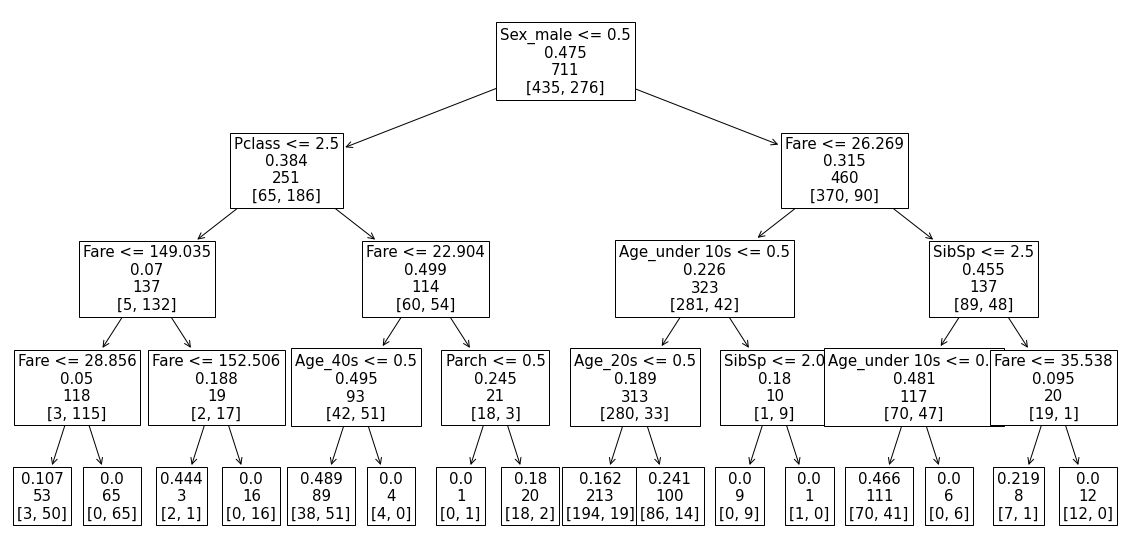

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X_train.columns, fontsize=15, label ="None", max_depth = 4)

# 7. Random Forest 결과 비교

In [85]:
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,20s,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,30s,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,20s,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,30s,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,30s,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,20s,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,10s,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30s,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,20s,0,0,111369,30.0000,C


In [86]:
from sklearn.model_selection import train_test_split

In [87]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 10, random_state = 100)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, pred)

0.8426966292134831

In [89]:
confusion_matrix(y_test, pred)

array([[102,  12],
       [ 16,  48]])

In [90]:
for i in range(2,20):
    model = RandomForestClassifier(max_depth = i, random_state = 100, n_jobs=3)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(accuracy_score(y_test, pred))

0.7865168539325843
0.7865168539325843
0.8202247191011236
0.8370786516853933
0.8539325842696629
0.8426966292134831
0.8370786516853933
0.848314606741573
0.8426966292134831
0.8258426966292135
0.8258426966292135
0.8258426966292135
0.8089887640449438
0.8202247191011236
0.8089887640449438
0.8146067415730337
0.8146067415730337
0.8146067415730337
